# Setup


In [1]:
import skimage.morphology as morph
import numpy as np
import utils


## Loading the image


Reading image: images/input/balls-with-reflections.png (512x512)


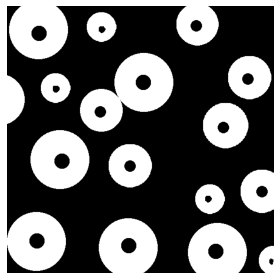

In [2]:
im = utils.read_image("balls-with-reflections.png")
binary_image = im != 0
utils.show_image(binary_image)


# Task 3d

Implement a function that takes in a binary image and a set of starting points indicating position of holes, and applies the hole filling algorithm outlined in the assignment:

for $row, column$ in $S$ do:  
&nbsp;&nbsp;&nbsp;&nbsp;$X_0[row, column] \leftarrow 1$  
for $k \leftarrow 1$ to $K$ do:  
&nbsp;&nbsp;&nbsp;&nbsp;$X_k \leftarrow (X_{k-1}\oplus B)\cap I^c$  
return $X_k \cup I$

The position of the holes are given in the starter code. Use 30 iterations ($K = 30$), and a $3 × 3$ structuring element ($B$) of all 1’s.


In [3]:
num_iterations = 30
structuring_element = np.ones((3, 3), dtype=bool)
starting_points = [
    # [row, column],
    [51, 64],
    [44, 180],
    [35, 365],
    [156, 94],
    [141, 264],
    [138, 467],
    [198, 180],
    [229, 413],
    [294, 103],
    [302, 230],
    [368, 388],
    [352, 489],
    [454, 57],
    [457, 236],
    [469, 400],
    [489, 506],
]


In [4]:
def fill_holes(
    image: np.ndarray,
    starting_points: list,
    num_iterations: int,
    structuring_element: np.ndarray,
) -> np.ndarray:

    filled = np.zeros(image.shape, dtype=bool)

    for row, column in starting_points:
        filled[row, column] = 1

    for _ in range(num_iterations):
        dilated = morph.binary_dilation(filled, structuring_element)
        filled = np.logical_and(dilated, image == 0)  # Intersection with I^c

    return filled + image  # Union


## Testing the function


Saving image to: images/output/task3d.png


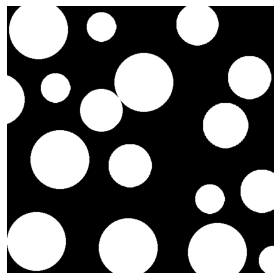

In [5]:
filled = fill_holes(binary_image, starting_points, num_iterations, structuring_element)

assert (
    filled.shape == im.shape
), f"Expected image shape ({im.shape}) to be same as resulting image shape ({filled.shape})"
assert (
    filled.dtype == np.bool
), f"Expected resulting image dtype to be np.bool. Was: {filled.dtype}"

utils.show_image(filled, save_as="task3d.png")
